# Проверка гипотез для увелечения выручки

описание проекта: 

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Цель проекта:

Дать рекомендации о продолжении, прекращении или завершении теста с положительным результатом

Задачи проекта: 
* провести приотеризацию гипотез по методике RICE и ICE
* проанализировать кумулятивные метрики: средний чек, выручка
* проанализировать аномальные значения в данных
* проверка статистической значимости данных A/B теста

# Этапы проекта
1) приотиризация гипотез
- приотиризация по методу ICE
- приотиризация по методу RICE
- основные отличия методов

2) Анализ A/B теста
- измениение типов данных к работе
- измениение заголоков
- работа с пропусками

3) Кумулятивный анализ
- построение графика кумулятивного среднего чека по группам 
- построение графика кумулятивного среднего количества заказов по группам

4) поиск аномальных значений
- поиск аномальных значений по количеству заказов на пользователя
- поиск аномальных значений по сумме заказа
- определение 90 95 99 прецентелей по данным

5) проверка статистической значимости
- статистическая значимость среднего количества заказов между группами А и B без учета аномальных значений
- статистическая значимость среднего чека между группами A и B без учета аномальных значений
- статистическая значимость среднего количества заказов между группами А и B с учетом аномальных значений
- статистическая значимость среднего чека между группами A и B с учетом аномальных значений

6) Рекомендации по результатом исследования
- общие выводы по работе
- рекомендации к A/B тесту

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats

In [20]:
hypo = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
hypo.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [21]:
hypo.columns = map(str.lower, hypo.columns)

### Приоритизация гипотез

#### Приотиризация гипотез по методу  ICE

Расчитаем фреймворк ICE для приоритизации гипотез. Внизу приведем формулу расчета

In [22]:
pd.options.display.max_colwidth = 130

In [23]:
hypo['ice'] = hypo['impact'] * hypo['confidence'] / hypo['efforts']
hypo[['hypothesis', 'impact', 'confidence', 'efforts', 'ice']].sort_values(by='ice', ascending=False)\
.reset_index(drop=True)

,hypothesis,impact,confidence,efforts,ice
0,"Запустить акцию, дающую скидку на товар в день рождения",9,9,5,16.200000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",10,8,6,13.333333
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,8,5,11.200000
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3,8,3,8.000000
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",3,7,3,7.000000
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",5,4,10,2.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",2,2,3,1.333333
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",3,3,8,1.125000
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,1,1.000000


Вывод по методу приотеризации ICE, 3 наиболее важные фичи для внедрения это запуск акции дающей скидку на товар ice_score 16.2, добавление 2 новых каналов привлечения трафика ice_score 13.3 и добавить форму подписки на все основные странички ice_score 11.2. К наименее важным задачам отнесем добавление страницы отзывов клиентов о магазине, изменение структуры категорий и изменение цвета фона главной страницы - ice_score у задач меньше 2

#### Приотиризация гипотез по методу  RICE

Применим RICE фреймворк для приотиризации гипотез 

In [24]:
hypo['rice'] = hypo['impact'] * hypo['confidence'] * hypo['reach'] / hypo['efforts']
hypo[['hypothesis', 'impact', 'confidence', 'efforts','reach', 'rice']]\
.sort_values(by='rice', ascending=False).reset_index(drop=True)

,hypothesis,impact,confidence,efforts,reach,rice
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,8,5,10,112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",3,7,3,8,56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",10,8,6,3,40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3,8,3,5,40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",9,9,5,1,16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",3,3,8,8,9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",5,4,10,2,4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",2,2,3,3,4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,1,3,3.0


Самый высокий приоритет по методике RICE получили предложения о добавлении формы подписки на все основные странички rice 112, что вдвое выше следующего предлодения о добавлении блоков рекомендаций товаров на сайт rice 56. Наименьший приоритет получили изменение цвета фона rice 3, добавление страницы отзыва rice 4, запустить собственную службу доставки rice 4

#### Сравнение приоретности при расчете RICE и ICE

В целом методология расчета RICE и ICE схожая, наибольший приоритет отдается задачам, которые имеют высокий числитель: сила влияния изменения (impact), уверенность (confidence) в параметрах при меньшем делении на знаминатель усилий по реализации задачи (effort). В методе RICE добавляется параметр охвата (reach), который позволяет оценивать охват пользователей, который затронет данное предложение. Из-за этого оценка приорететности может быть разной по RICE и ICE.
Есть предложения по типу: добавить форму подписки, добавить два новых канала, которые важны и по методики RICE и по методике ICE. Они занимают высокое место в методе RICE и ICE. Однако, есть и заметные отличия в оценке приоритетности, например запуск акции занимает самый важный приоритет по методике ICE, однако по методике RICE из-за маленького параметра reach занимает лишь 5-ое место


### Анализ A/B-теста

Проанализируем данные A/B теста. Раскроем данные о заказах и перенесем их в датафрейм orders. Также перенесем данные о количестве клиентов за каждый день и перенесем в датафрейм visitors

In [25]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
display(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [26]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'}, inplace=True)                                                                          

Привели столбец data к типу datetime, привели столбцы к змеиному регистру

In [27]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
display(visitors.info())
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [28]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Привели столбец data к типу datetime, привели столбцы к змеиному регистру

Проверим полученные датафреймы на дубликаты

In [29]:
print('Дубликаты в датафейме visitors ',visitors.duplicated().sum())
print('Дубликаты в датафейме orders ',orders.duplicated().sum())

Дубликаты в датафейме visitors  0
Дубликаты в датафейме orders  0


Дубликаты в датафреймах не найдены

group
A    557
B    640
Name: visitor_id, dtype: int64

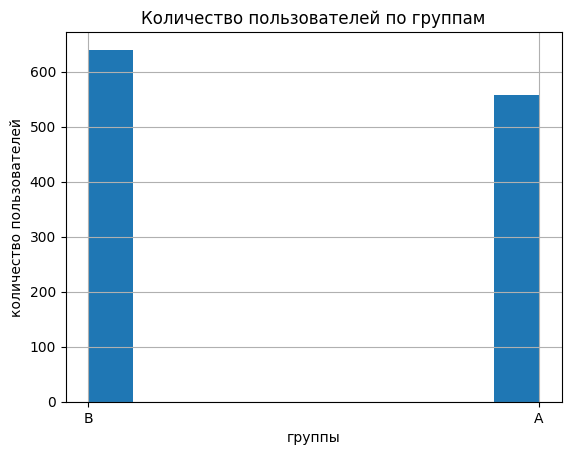

In [30]:
display(orders.groupby('group')['visitor_id'].count())
orders['group'].hist()
plt.title('Количество пользователей по группам')
plt.ylabel('количество пользователей')
plt.xlabel('группы')
plt.show()

Всего в у нас в датафрейме orders представленно 2 группы A и B. Количество пользователей групп примерно одинаковое, однако группа B на 13% больше. 

In [31]:
min_date = visitors['date'].min()
max_date = visitors['date'].max()
print('Дата начала проведения теста ', min_date, '', 'дата окончания проведения теста', max_date)
print('разница', max_date-min_date)

Дата начала проведения теста  2019-08-01 00:00:00  дата окончания проведения теста 2019-08-31 00:00:00
разница 30 days 00:00:00


Видим что сам тест занимает 30 дней, начало 1 августа 2019 года и конец 31 августа 2019 года

In [32]:
(orders.groupby('visitor_id')['group'].count() > 1).sum()

94

Проверка на то что некоторые пользователи могут входить сразу в 2 группы показала, что у нас есть 94 пользователя по данному критерию. По хорошему их надо удалить из анализа, но так как их величина превышает 9%, то их удаление приведет к утечке данных

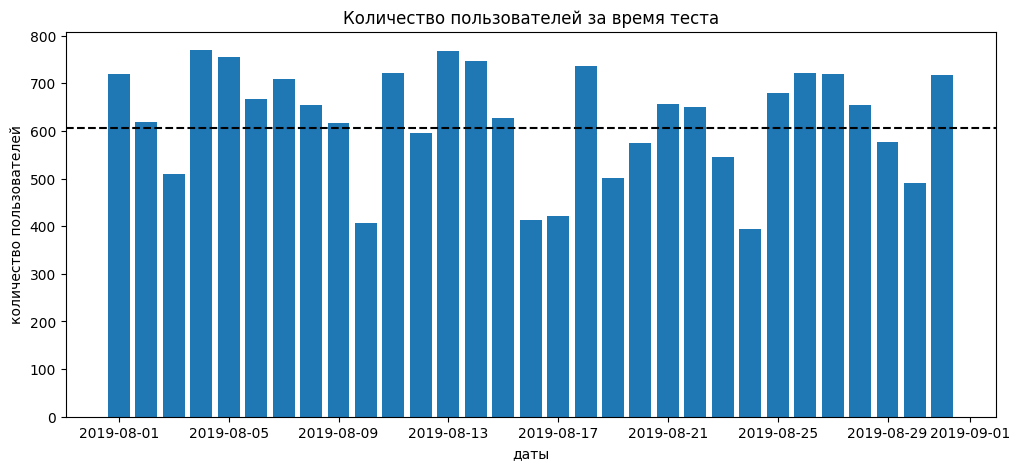

In [33]:
plt.figure(figsize=(12, 5))
plt.bar(visitors['date'], visitors['visitors'])
plt.axhline(y=visitors['visitors'].mean(), color='black', linestyle='--') 
plt.title('Количество пользователей за время теста')
plt.ylabel('количество пользователей')
plt.xlabel('даты')
plt.show()

как видно из графика пользователей сайта, их число держалось примерно на уровне 600 пользователей. Однако также заметны дни, когда наблюдался спад активности например 10, 16, 17 дни

### Кумулятивный анализ

Проанализируем кумулятывные показатели выручки и среднего чека по группам

#### График кумулятивной выручки по группам

In [34]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [35]:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                    .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [36]:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [37]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()           

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [38]:
if (cumulativeData['date'].min() == orders['date'].min()) and cumulativeData['date'].max() == orders['date'].max():
    print('Датафрейм cumulativeData был создан корректно')
else:
    print('Датафрейм cumulativeData был создан некорректно')

Датафрейм cumulativeData был создан корректно


Сделали проверку на корректное создание датафрейма cumulativeData

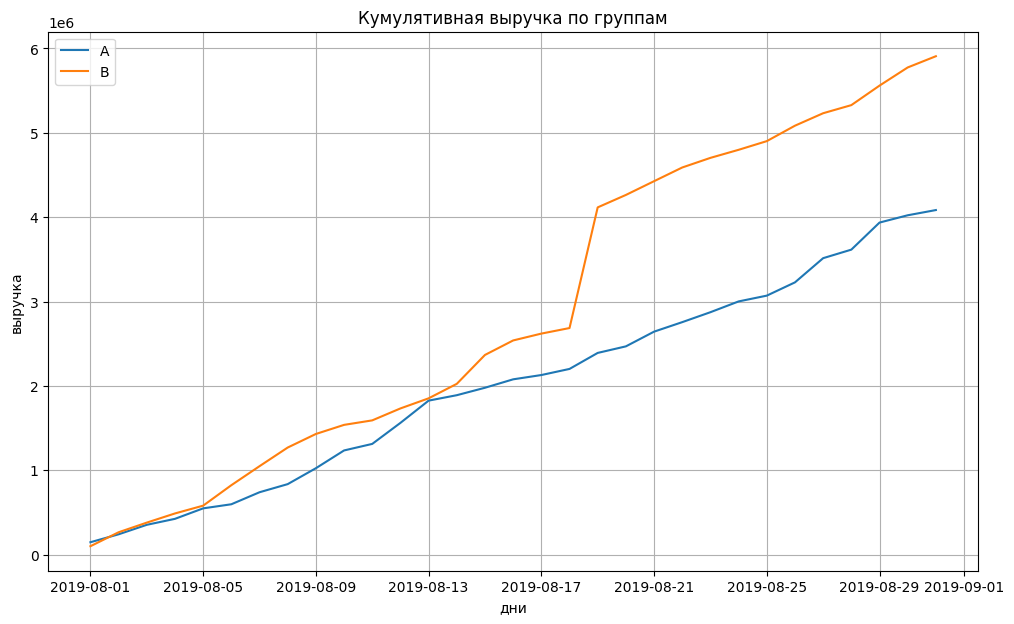

In [39]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 7))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.ylabel('выручка')
plt.xlabel('дни')
plt.grid(True)
plt.legend() 
plt.show()

На графике видно, что кумулятивная выручка группы B на протяжении всего периода анализа привосходит группу A, также виден всплеск в районе 18-19 дня у группы B, что может быть связано с резким увеличением числа заказов, либо появление очень дорогих заказов у группы.

#### Кумулятивный средний чек

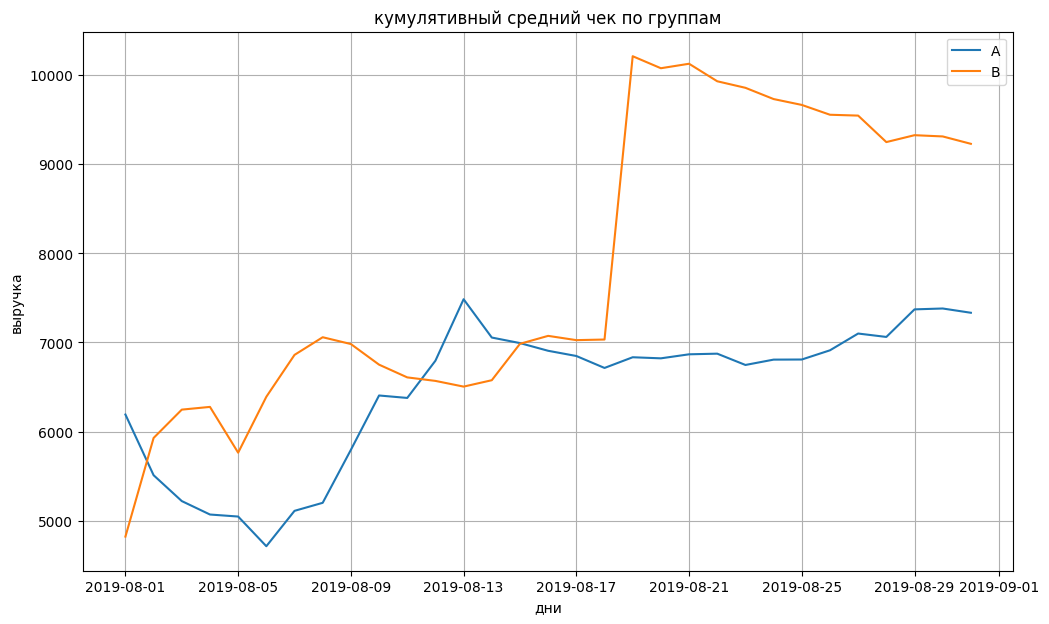

In [40]:
plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('кумулятивный средний чек по группам')
plt.ylabel('выручка')
plt.xlabel('дни')
plt.grid(True)
plt.legend() 
plt.show()

Аналогичную динамику демонстрирует средний чек у обеих групп. Средний чек группы B преобладает, также обнаружен резких скачек в среднем заказе в 18-19 число, что свидетельствует о возможной аномальной активности в эти дни

#### Изменение кумулятивного среднего чека группы B к группе A

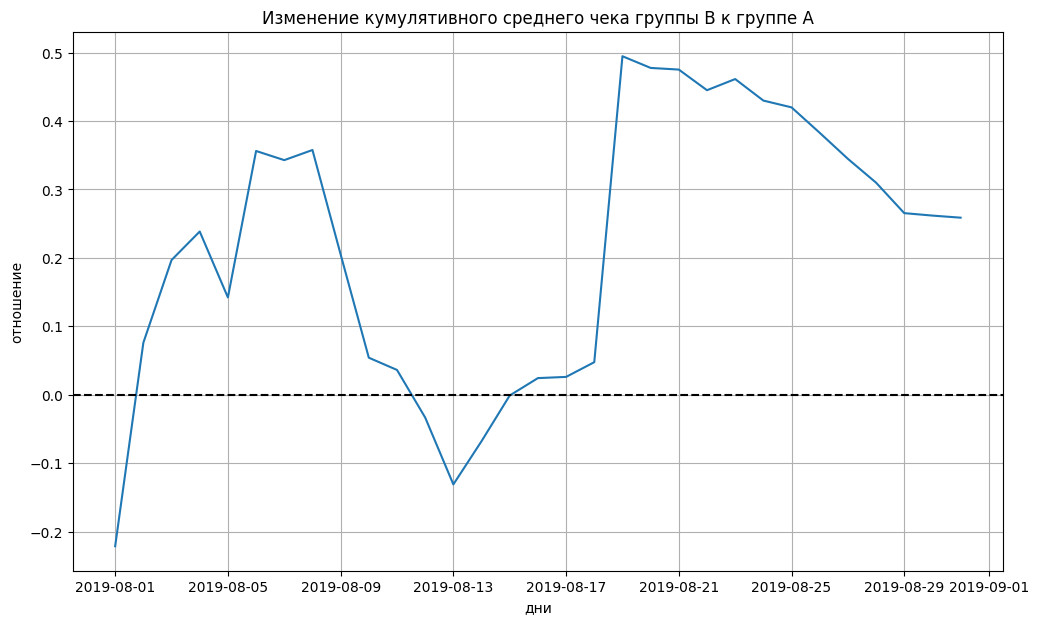

In [41]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB, on='date', suffixes=['A', 'B']))

plt.figure(figsize=(12, 7))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('отношение')
plt.xlabel('дни')
plt.grid(True)
plt.show()

Средний чек группы B стабильно выше группы A на протяжение всего периода анализа, на 13-ое число отношение поменялось. Средний чек  группы A был больше, однако затем группа A также стала преобладать

Промежуточный вывод: Из построенных ранее графиков нам удалось сделать вывод, что группа B преобладает и по величине кумулятивной выручки и по среднему чеку. Заметны всплески активности на графике выручки, что может свидетельствовать о влиянии аномалий.

#### график кумулятивного среднего количества заказов на посетителя по группам

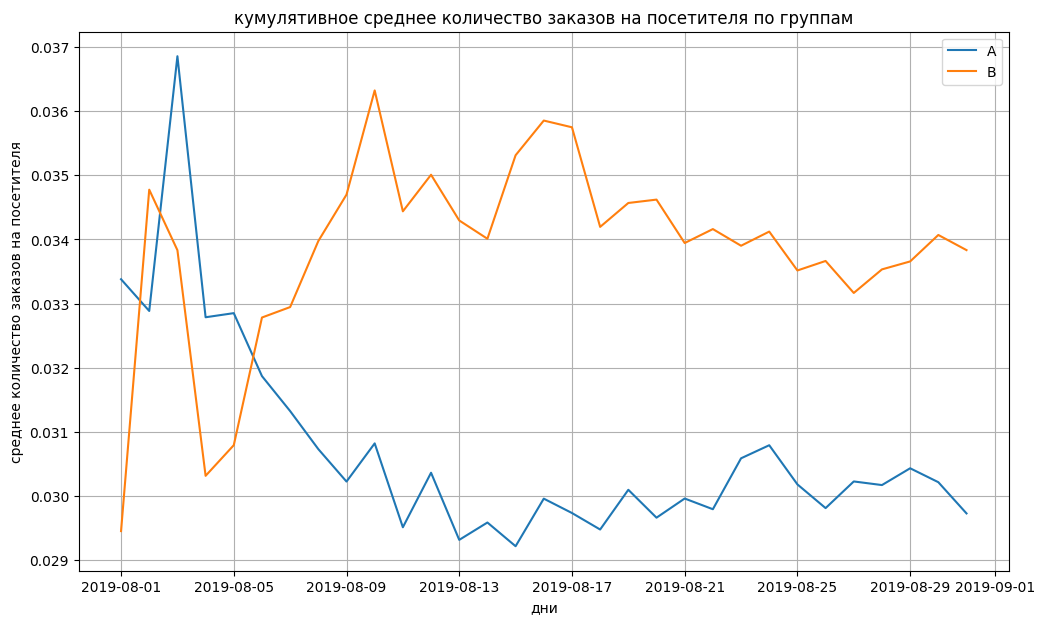

In [42]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12, 7))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('кумулятивное среднее количество заказов на посетителя по группам')
plt.grid(True)
plt.ylabel('среднее количество заказов на посетителя')
plt.xlabel('дни')
plt.legend()
plt.show()

На графике виден всплеск в кумулятивном среднем количестве заказов у двух груп в начале анализа, затем на протяжении всего теста куиулятивное среднее количество заказов держалось у двух групп примерно на одинаковых для них уровнях. Кумулятивное среднее количество заказов у группы A стабильно меньше чем у группы B

#### график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

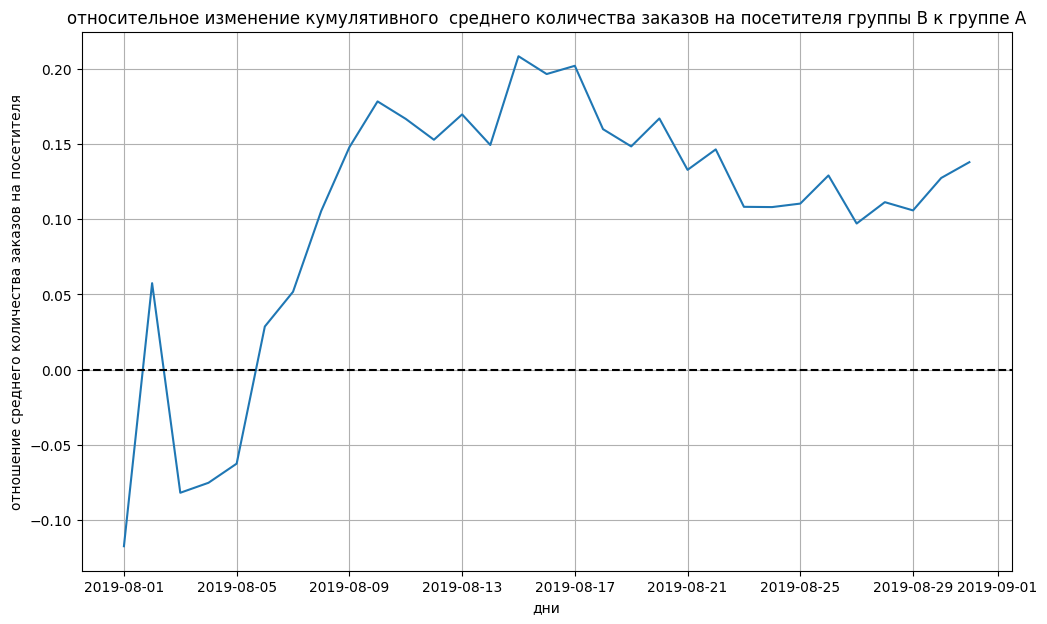

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('дни')
plt.ylabel('отношение среднего количества заказов на посетителя')
plt.title('относительное изменение кумулятивного  среднего количества заказов на посетителя группы B к группе A')
plt.grid(True)
plt.show()

На графике кумулятивный средний чек группы B с 5-ого дня теста стабильно выше кумулятивного среднего чека у группы A. 

Промежуточный вывод: Проанализировав данные о кумулятивной выручке, кумулятивном среднем количестве заказов и кумулятивном среднем чеке можно предположить, что имеется вероятность нахождения аномалий в данных которые могут исказить выводы

### Поиск аномальных значений в данных

Рассмотрим подробнее данные о количестве заказов у каждого пользователя на предмет аномальных значений

#### точечный график количества заказов по пользователям

Рассмотрим аномальные значения на примере количества заказов у каждого пользователя

In [44]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'order_count']
ordersByUsers.head()

,visitor_id,order_count
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


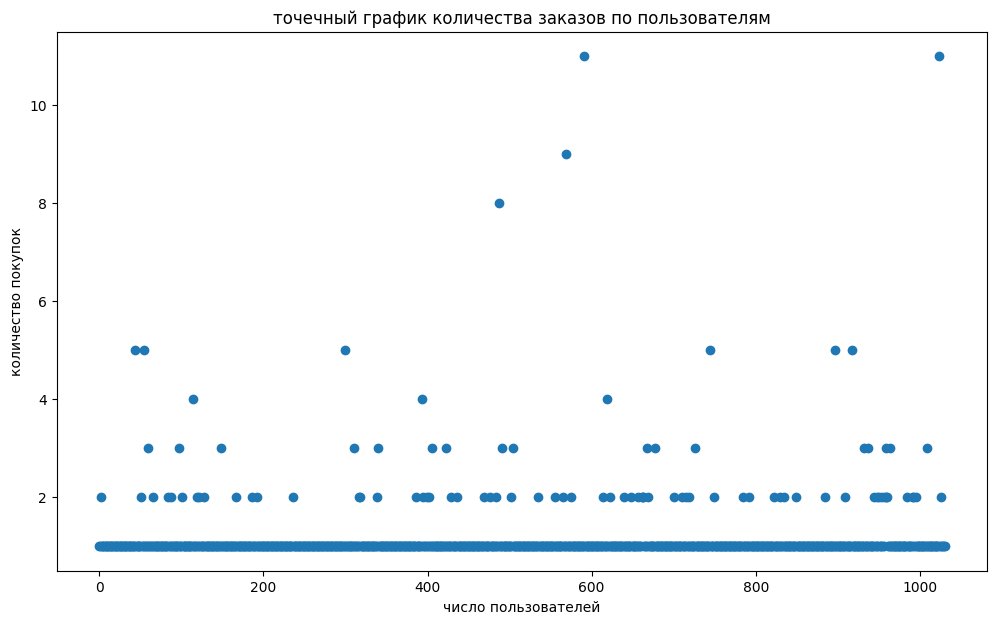

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers['visitor_id'])))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, ordersByUsers['order_count']) 
plt.title('точечный график количества заказов по пользователям')
plt.ylabel('количество покупок')
plt.xlabel('число пользователей')
plt.show()

Большая часть пользователей делали по одной покупке, также заметны выделяющиеся аномальные значения больше 10 покупок

####  95-й и 99-й перцентили количества заказов на пользователя

In [46]:
np.percentile(ordersByUsers['order_count'], [90, 95, 99])
order_count_anomaly = np.percentile(ordersByUsers['order_count'], 99)

Из вычисленных значений 90 перцентиля, сделаем вывод, что 10% пользователей совершили больше одной покупки, тогда как больше 4 покупок совершили лишь 1% пользователей, что дает основания говорить, что все значения выше 4 можно считать аномалиями

Проанализируем на предмет аномалий стоймости заказов пользователей

#### точечный график стоимостей заказов

In [47]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


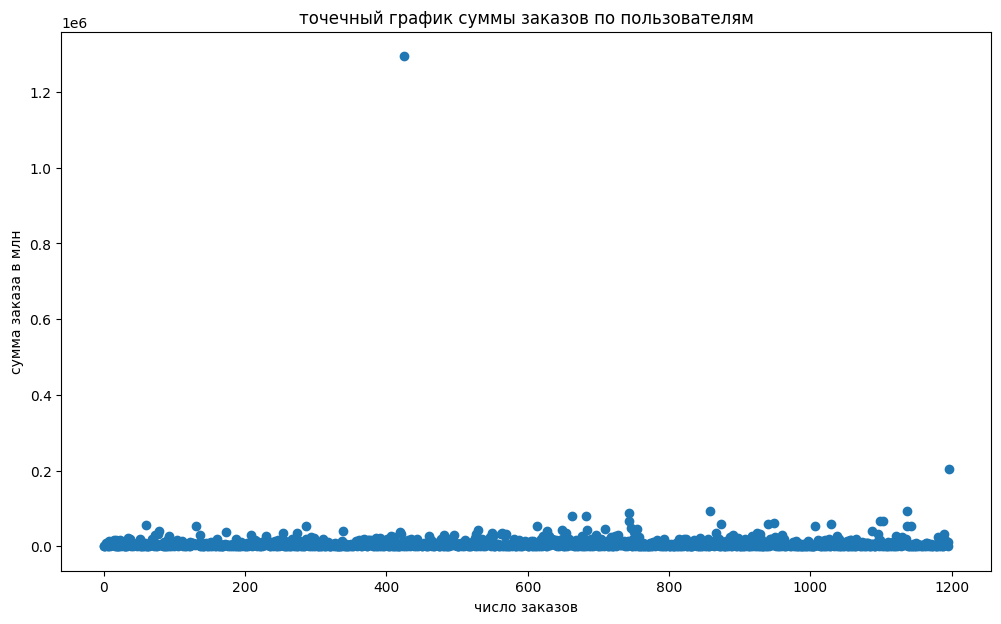

In [48]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders['revenue']) 

plt.title('точечный график суммы заказов по пользователям')
plt.ylabel('сумма заказа в млн')
plt.xlabel('число заказов')
plt.show()

На графике также можно обнаружить аномальные значения, причем настолько высокие, что они заметно дальше от основного количества заказов. Укрупним график, ограничив маштаб суммы заказа до 200 тыс

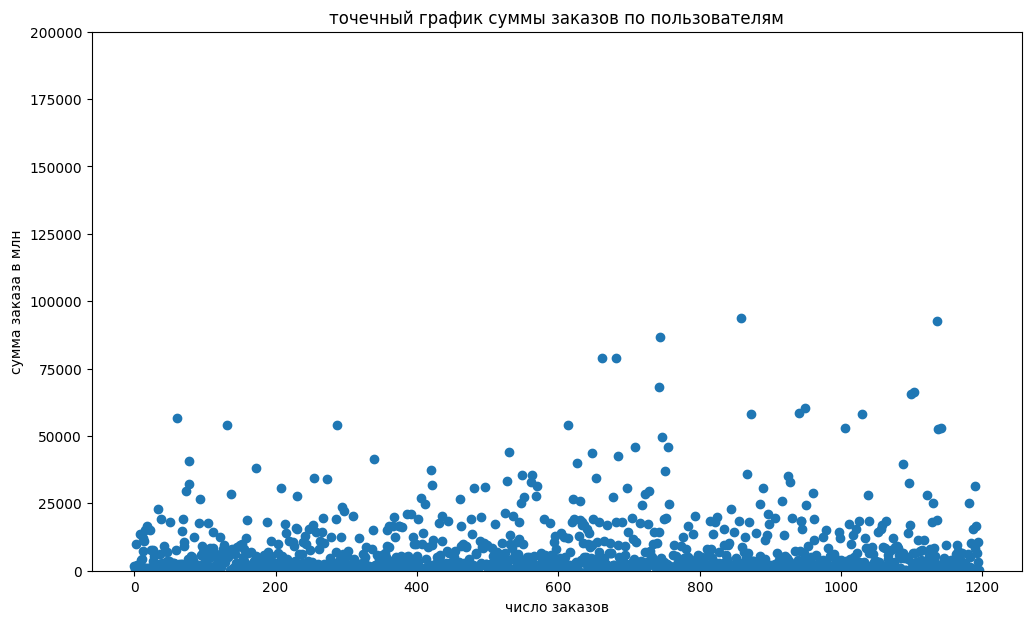

In [49]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders['revenue']) 
plt.ylim(0, 200000)
plt.title('точечный график суммы заказов по пользователям')
plt.ylabel('сумма заказа в млн')
plt.xlabel('число заказов')
plt.show()

По графику видно, что большая часть значений лежит в области до 60 тысяч, дальше количество заказов заметно снижается

#### 95-й и 99-й перцентили стоимости заказов

In [50]:
display(np.percentile(orders['revenue'], [90, 95, 99]))
revenue_anomaly = np.percentile(orders['revenue'], 99)

array([18168. , 28000. , 58233.2])

Исходя из перцентелей сделаем вывод, что только 10% заказов выше по стоймости чем 18 тысяч, тогда как лишь 1% заказов выше 58 тысяч. Сделаем вывод что все значения выше 58 тысяч можно признать аномальными

Промежуточный вывод: Мы нашли аномальные значения среди количества заказов, заказы больше 4 штук на пользователя аномальны и по стоймости заказа превышающей 58 тысяч также признаем аномальными

### Проверка статистической значимости

#### статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Проверим статистическую значимость среднего количества заказов групп A и B без фильтрации по аномальным значениям 

Сформируем две гипотезы о равенстве среднего количества заказов в 2-ух группах

* H0 среднее количества заказов групп A и B равно 
* H1 среднее количества заказов групп A и B не равно 

In [51]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [52]:
visitorsPerDateA = visitors[visitors['group'] == 'A']
visitorsPerDateB = visitors[visitors['group'] == 'B']
visitorsPerDateB.head()

,date,group,visitors
31,2019-08-01,B,713
32,2019-08-02,B,581
33,2019-08-03,B,509
34,2019-08-04,B,770
35,2019-08-05,B,707


In [53]:
sampleA = (
    pd.concat([ordersByUsersA['orders'],
    pd.Series(0, index=np.arange(visitorsPerDateA['visitors'].sum() - len(ordersByUsersA['orders'])),
    name='orders')],axis=0)
          )
sampleB = (
    pd.concat([ordersByUsersB['orders'],
    pd.Series(0, index=np.arange(visitorsPerDateB['visitors'].sum() - len(ordersByUsersB['orders'])),
    name='orders')],axis=0)
          )

In [54]:
print("p-value {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("различие в средних {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.017
различие в средних 0.138


p-value = 0.017, что меньше порогового значения 0.05, значит можно отбросить гипотезу H0 о равенстве среднего количества заказов у 2-ух групп. Среднее группы B выше чем среднее группы B примерно на 13,8%. Сделаем вывод о статистической значимости различия среднего количества заказов групп А и B. Принимаем гипотезу H1

#### статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформируем две гипотезы, чтобы доказать статистическую значимость в среднем чеке между группами по данным без фильтрации аномалий
 
* H0 среднее значение чека у групп A и B равно
* H1 среднее значение чека у групп A и B не равно

In [55]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print('различие в средних {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
                       /orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value 0.729
различие в средних 0.259


p-value значительно выше порога статистической значимости в 0.05, поэтому не можем принять гипотезу о различии среднего чека между группами, хотя среднее чека группы B на 25.9 процента выше среднего чека группы A 

Промежуточный вывод: Мы провели тесты на статистическую значимость среднего количества заказов и среднего чека у групп A и B по критерию Манна - Уитни. Сделали вывод о статистической значимости различия среднего количества у групп и не смогли отбросить гипотизу H0 в отношении среднего чека групп.

Выясним как поменяются выводы о статистической значимости о количестве заказов и среднем чеке после удаления аномальных значений

####  статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [56]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_count_anomaly]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > order_count_anomaly]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_anomaly]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape[0] 

15

Всего имеются 15 пользователей с аномальными данными по сумме заказа больше 58 тысячи и (или) количестве заказов больше 4.

In [57]:
sampleAFiltered = (
    pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id']
                                             .isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visitorsPerDateA['visitors'].sum() - len(ordersByUsersA['orders'])),
    name='orders')],axis=0)
          )
sampleBFiltered = (
    pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id']
                                             .isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visitorsPerDateB['visitors'].sum() - len(ordersByUsersB['orders'])),
    name='orders')],axis=0)
          )

Сформируем переменные групп без учета аномальных пользователей

In [58]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('различие в средних {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.014
различие в средних 0.153


p-value 0.014 что ниже порога статистической значимости. Среднее количества заказов группы B больше среднего группы A примерно на 15.3 %. Следовательно принимаем теорию о значимости отличия средних двух групп.

Из проделанного опыта следует, что аномальные пользователи не повлиляли на выводы по различию среднего количества заказов для двух групп

#### статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [59]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'])[1]
    )
)

print("различие в средних {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() - 1
    )
)
 

p-value 0.851
различие в средних -0.006


p-value = 0.85 что намного выше порога статистической значимости 0.05, поэтому нельзя отвергнуть гипотезу о равенстве средних чека двух групп. Средний чек группы B на 0.6% ниже группы А

Ситуация изменилась в случае со средним чеком двух групп. Исключив аномальные значения мы наоборот повысили p value у теста было примерно 72%, а стало 85%. Разница между средними заметно сократилась, в тесте без учета аномальных значений средний чек группы B был на 25.9% процента выше среднего группы A, теперь они примерно равны. С большей вероятностью можно говорить что средний чек групп примерно одинаковый

Промежуточный вывод: Проанализировали средние количества заказов и средние чека по двум группам без учета 15 аномальных пользователей сделаем вывод, что их влияние на среднее количество заказов не значительно и можем принимать гипотезу о разнице количества заказов в 2 группах. Однако, после удаления аномальных значений мы увеличили вероятность равенства среднего чека в двух группах, поэтому не можем отбросить эту гипотезу.

### Рекомендации по результатам A/B теста

В ходе исследования по пункту 1 мы сделали вывод, что по методу RICE наиболее приорететной задачей является добавление формы подписки на основные странички, а по методу ICE запуск акции дающей скидку на товар. Наиболее важные задачи для 2-ух методов например: добавить форму подписки, добавить два новых канала.

По графику сравнения кумулятивного среднего чека группа В выше среднего чека группы А 
По графику сравнения Кумулятивного среднего количества  заказов группы В выше количества заказов группы А 

Определены аномальные значения по количеству заказов на пользователя больше 4 заказов
и аномальные значения по сумме заказа - это заказы дороже 52.223 тысяч 
Всего 15 пользователей попадающих под аномальные значения

Статистическая значимость различия среднего количества заказов у группы А и B. p value = 0.14. Среднее количество заказов у группы B примерно на 15.3% выше чем у группы A c учетом аномальных значений
Статистическая значимость между среднем чеке заказа между группами A и B не найдена p value = 0.85. Средний чек группы B ниже среднего чека группы A на 0.6%


Исходя из проведенного выше иследования среднего количества заказов и среднего чека для двух групп с учетом и без учета влияния аномальных значений сделаем вывод о продолжении теста. Так как существует статистическая значимость различия у среднего количества заказов у двух групп с учетом и без учета аномальных значений. Среднее количество заказов у группы B больше. Однако, нельзя сделать вывод о статистической значимости различия среднего чека у двух групп. Тем не менее возможна тенденция об ухудщении среднего чека у группы А, после исключения аномальных значений из расчета теста. 